# Projeto 1: Otimização de Campanhas de Marketing

### Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error

### Data

In [9]:
df = pd.read_csv("campaigns.csv")
df.head()

,campaign_id,budget,channel,engagement,roi
0,1,5000,Facebook,1200,1.5
1,2,10000,Google,3000,2.0
2,3,7000,TV,2500,1.8
3,4,3000,Instagram,800,1.2
4,5,20000,Google,5000,2.5


### Data preprocessing

In [10]:
# Splitting variables into predictors and target variable (or dependent variable)
X = df[["budget", "channel", "engagement"]]
y = df["roi"]

# one hot encoding for channel
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_encoded = encoder.fit_transform(X[["channel"]])

X_encoded

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [11]:
# Since one-hot encoding was used on the predictor variables, the data ended up with only one dimension (in vector form).
# This reshape ensures that the data returns to a matrix format to run the ML model
X_encoded = X_encoded.reshape(-1, X_encoded.shape[1])

# The code below combines existing numerical columns (budget and engagement) with the variables that were encoded in one-hot encoding.
# This creates a final input matrix (X_final) with all relevant variables that will be used in the model.
X_final = np.hstack((X[["budget", "engagement"]].values, X_encoded))

X_final

array([[5.0e+03, 1.2e+03, 1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+04, 3.0e+03, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00],
       [7.0e+03, 2.5e+03, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00],
       [3.0e+03, 8.0e+02, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00],
       [2.0e+04, 5.0e+03, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00],
       [1.5e+04, 4.0e+03, 1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [4.0e+03, 1.0e+03, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00],
       [8.0e+03, 2.2e+03, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00],
       [1.2e+04, 3.5e+03, 0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00],
       [9.0e+03, 2.8e+03, 1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00]])

In [12]:
# Split data into training and testing sets, with 70% of the dataset for training and 30% for testing.
# In addition, we use random_state=42 to ensure reproducibility of results, so that the results are always the same whenever the code is executed
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

### Model Training

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 0.008880675056313457
Root Mean Squared Error (RMSE): 0.09423733366513219
Mean Absolute Error (MAE): 0.059717449408166846


# Graph Visualization


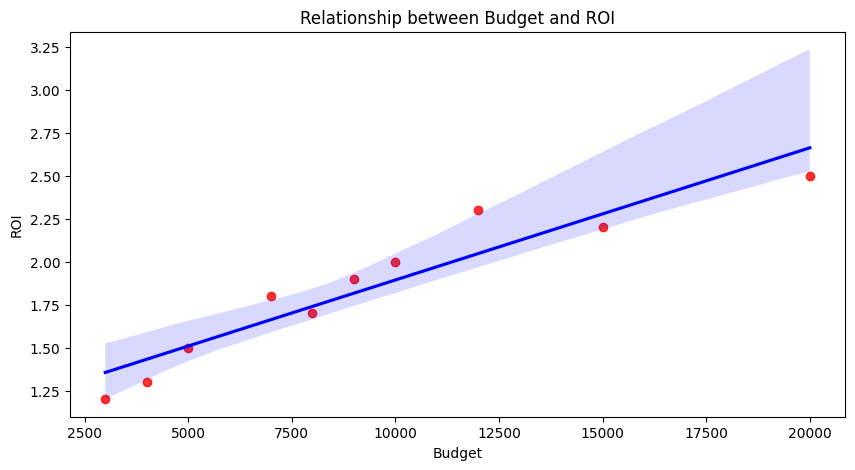

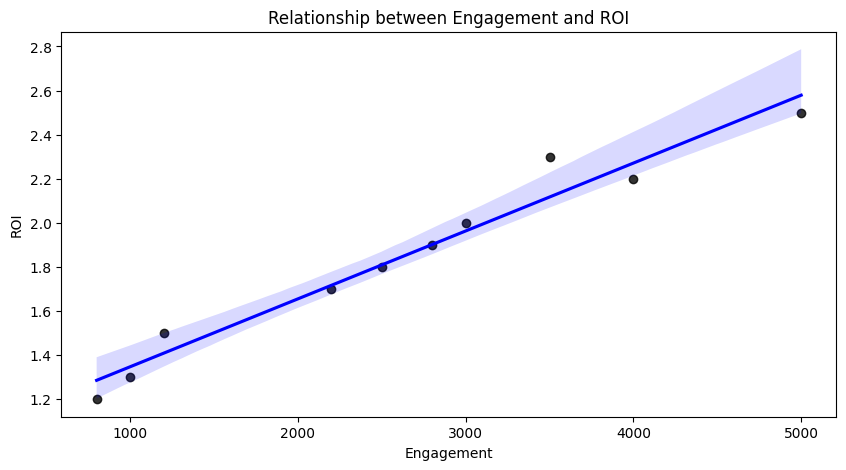

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.regplot(x="budget", y="roi", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.xlabel("Budget")
plt.ylabel("ROI")
plt.title("Relationship between Budget and ROI")
plt.show()

plt.figure(figsize=(10, 5))
sns.regplot(x="engagement", y="roi", data=df, scatter_kws={"color": "black"}, line_kws={"color": "blue"})
plt.xlabel("Engagement")
plt.ylabel("ROI")
plt.title("Relationship between Engagement and ROI")
plt.show()

# Campaign Optimization

In [16]:
# First, we create a function to suggest marketing campaign optimization based on 3 key variables: budget, channel and engagement
def suggest_optimization(budget, channel, engagement):
    input_df = pd.DataFrame([[budget, channel, engagement]], columns=["budget", "channel", "engagement"])

    # preprocess in the same way done for the model
    channel_encoded = encoder.transform(input_df[["channel"]]) #Transforms the categorical variable "channel" into dummies.
    channel_encoded = channel_encoded.reshape(1, -1)  # Adjust to avoid dimension error, ensuring it has one row and multiple columns
    input_data = np.hstack((input_df[["budget", "engagement"]].values, channel_encoded)) #Horizontally concatenates the numerical values of "budget" and "engagement" with the encoded values, creating a complete input vector in the same format as the one used by the model during training

    # Predict ROI
    predicted_roi = model.predict(input_data)[0]
    return predicted_roi

# Channel Comparison

In [17]:
def compare_channels(budget, engagement):
    # Gets the list of possible channels encoded by the encoder
    possible_channels = encoder.categories_[0]

    # Initializes variables to store the best channel and the highest ROI found
    best_channel = None
    best_roi = -float("inf")

    # List to store results for each channel
    results = []

    # For each possible channel, predict the ROI using the suggest_optimization function
    for channel in possible_channels:
        predicted_roi = suggest_optimization(budget, channel, engagement)

        # Stores the channel and predicted ROI in the results list
        results.append((channel, predicted_roi))

        # Updates the best channel and ROI if the current one is greater
        if predicted_roi > best_roi:
            best_roi = predicted_roi
            best_channel = channel

    # Prints the comparison of ROIs for all channels
    print("Channel Comparison:")
    for channel, roi in results:
        print(f"Channel: {channel}, Predicted ROI: {roi:.2f}")

    # Returns the suggested best channel with its predicted ROI formatted
    return f"Suggested best channel: {best_channel} with predicted ROI of {best_roi:.2f}."

### Previsões de ROI

 Given the Budget, Channel and Engagement, what is the ROI?

In [20]:
budget = 6000
channel = "Facebook"
engagement = 1400
roi = suggest_optimization(budget, channel, engagement)
print(f"Predicted ROI: {roi:.2f}")

Predicted ROI: 1.54



Considering only Budget and Engagement, which channel has the highest ROI?

In [19]:
budget = 6000
engagement = 1400
best_channel = compare_channels(budget, engagement)
print(best_channel)

Channel Comparison:
Channel: Facebook, Predicted ROI: 1.54
Channel: Google, Predicted ROI: 1.60
Channel: Instagram, Predicted ROI: 1.37
Channel: TV, Predicted ROI: 1.50
Suggested best channel: Google with predicted ROI of 1.60.
